In [45]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns

In [46]:
# Function to load dataset and automatically choose classes based on folder names
def load_dataset_and_classes(data_folder):
    class_folders = os.listdir(data_folder)
    classes = []
    for folder in class_folders:
        if os.path.isdir(os.path.join(data_folder, folder)):
            classes.append(folder)
    class_indices = {cls: i for i, cls in enumerate(classes)}
    
    X_data = []
    y_data = []
    
    for cls in classes:
        cls_folder = os.path.join(data_folder, cls)
        files = os.listdir(cls_folder)
        for file in files:
            image_path = os.path.join(cls_folder, file)
            # Load image using OpenCV
            image = cv2.imread(image_path)
            # Convert image to RGB (OpenCV loads images in BGR format)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Resize image to desired dimensions (e.g., 32x32)
            image = cv2.resize(image, (32, 32))
            # Append image data to X_data and corresponding label to y_data
            X_data.append(image)
            y_data.append(class_indices[cls])
            
    return X_data, y_data, classes

In [47]:
# Load your dataset and automatically choose classes based on folder names
data_folder = r'C:\Users\varsh\Desktop\Vehicle dataset\dataset'
X_data, y_data, classes = load_dataset_and_classes(data_folder)

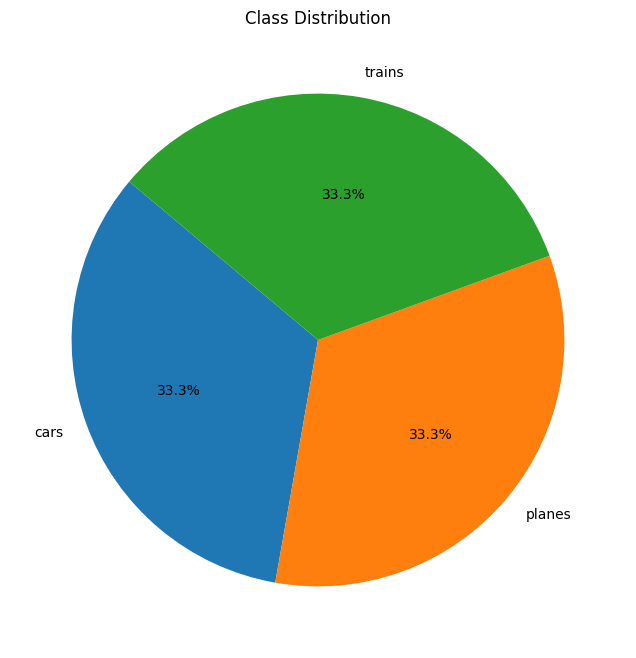

In [67]:
class_counts = {cls: np.sum(y_data == i) for i, cls in enumerate(classes)}

# Plot a pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [68]:
# Convert lists to numpy arrays
X_data = np.array(X_data)
y_data = np.array(y_data)


In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [70]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [71]:
# Define the model architecture (you can modify this as needed)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

C:\Users\varsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [72]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4643 - loss: 1.0255 - val_accuracy: 0.6583 - val_loss: 0.6960
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7180 - loss: 0.6348 - val_accuracy: 0.7042 - val_loss: 0.5707
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7866 - loss: 0.5054 - val_accuracy: 0.7708 - val_loss: 0.5737
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8121 - loss: 0.4675 - val_accuracy: 0.7792 - val_loss: 0.5261
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8312 - loss: 0.4011 - val_accuracy: 0.8500 - val_loss: 0.4049
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8560 - loss: 0.3632 - val_accuracy: 0.7292 - val_loss: 0.5196
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8733 - loss: 0.3409 - val_accuracy: 0.8042 - val_loss: 0.4265
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9102 - loss: 0.2555 - val_accuracy: 0.8542 - v

In [74]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8701 - loss: 0.3775
Test Loss: 0.32653599977493286
Test Accuracy: 0.887499988079071


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        87
           1       0.90      0.95      0.92        73
           2       0.88      0.88      0.88        80

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



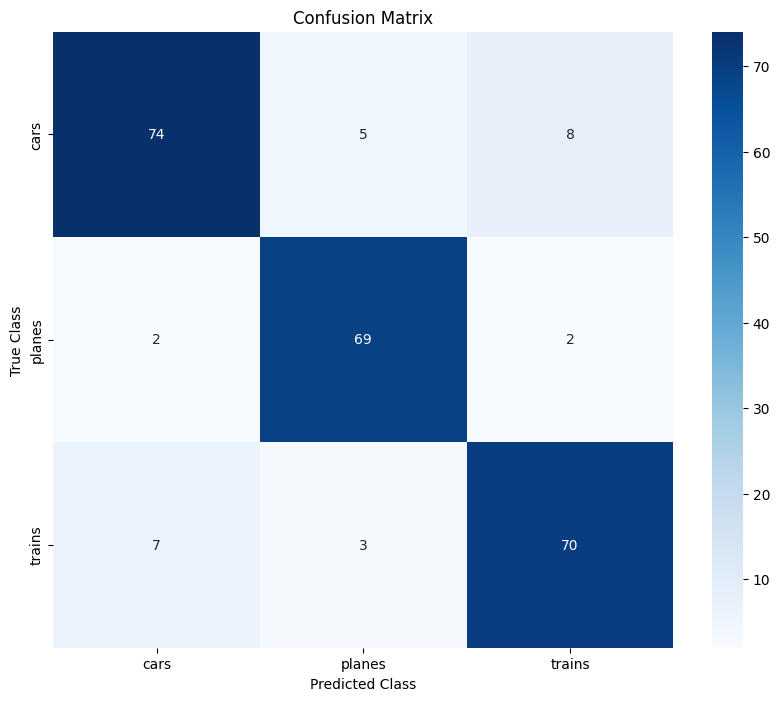

In [75]:
# Make predictions
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


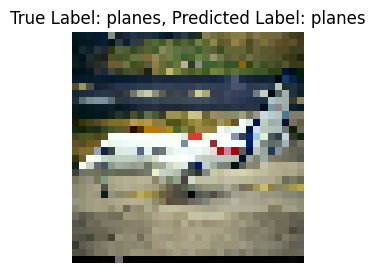

In [76]:
# Plot a sample image with predicted label
def plot_predicted_sample(X, y_true, y_predi, classes, index):
    plt.figure(figsize=(6, 3))
    plt.imshow(X[index])
    plt.title(f"True Label: {classes[y_true[index]]}, Predicted Label: {classes[y_predi[index]]}")
    plt.axis('off')
    plt.show()

# Plot a sample image with predicted label
plot_predicted_sample(X_test, y_test, predicted_classes, classes, index=3)

In [77]:
# Function to predict image using the trained model and classes
def predict_image(image_path):
    # Load the input image
    input_image = cv2.imread(image_path)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Preprocess the image
    input_image = cv2.resize(input_image, (32, 32))  # Resize the image to match model input size
    input_image = input_image / 255.0  # Normalize pixel values to be between 0 and 1

    # Make predictions
    prediction = model.predict(np.expand_dims(input_image, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]

    # Display the input image with the predicted label
    plt.imshow(input_image)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


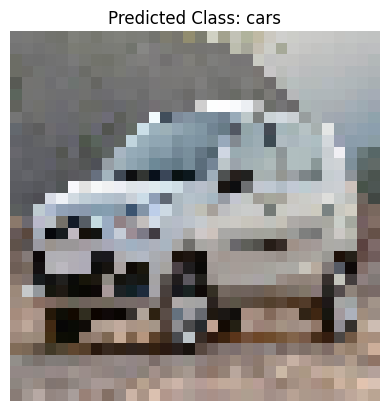

In [78]:
predict_image(r"C:\Users\varsh\Downloads\maruti-alto-k10-white-front-angle-8465-17f5_wm.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


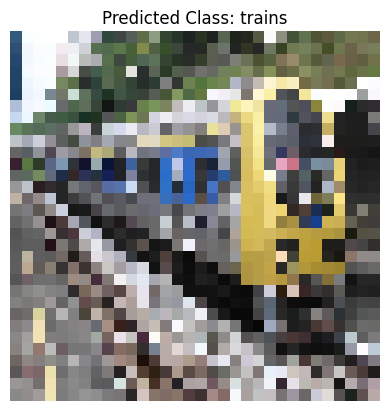

In [79]:
predict_image(r"C:\Users\varsh\Downloads\R.jpg")